In [1]:
# Setting PYTHONPATHs & ENVIRONMENT VARIABLEs
import os
import sys
os.environ['FLUENT_HOME'] = r"C:\Users\lupus\OneDrive\GIT\OwnProjects\Speech Recognition\speech-to-intent"
sys.path.append(os.environ['FLUENT_HOME'] + '\\src')

In [261]:
# Import packages
from IPython import display

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

from data_handler import DataHandler

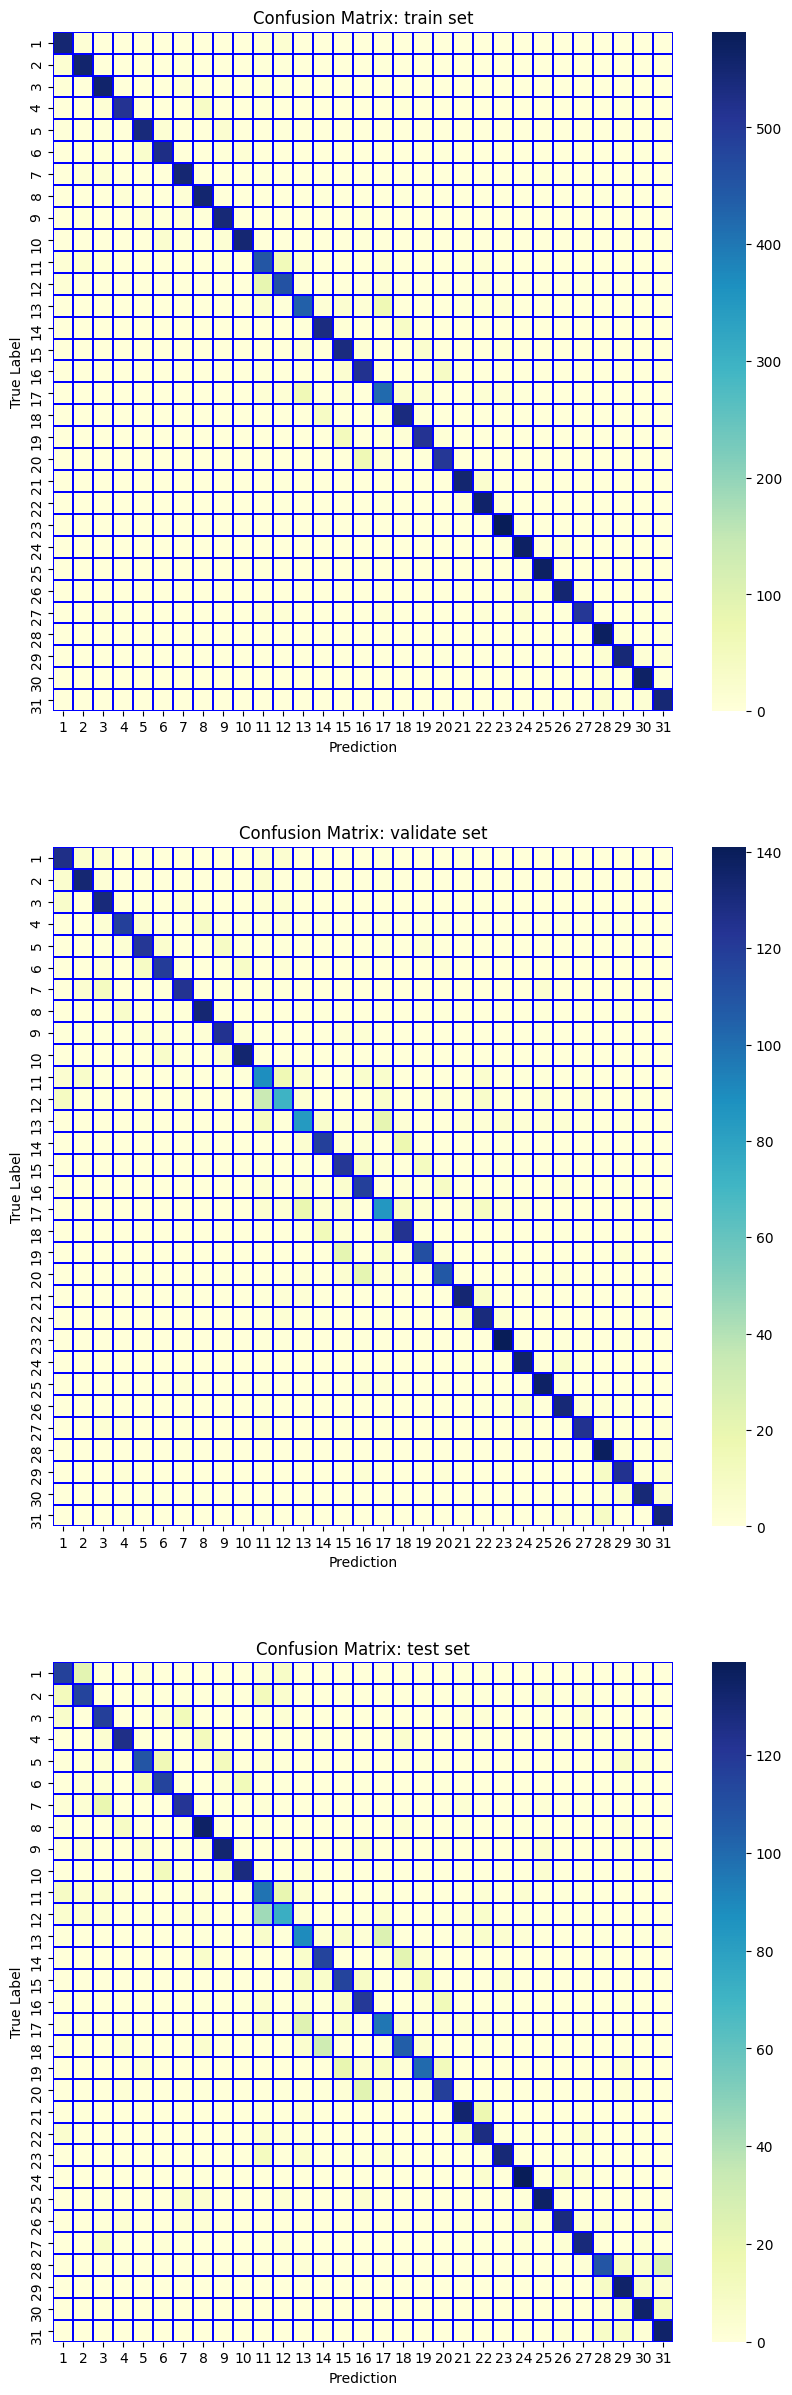

In [4]:
# Display confusion matrix of the best model
exp_id = '20210714003953'
path = f"{os.environ['FLUENT_HOME']}/result/confusion_matrix/{exp_id}_confusion_matrix.png"
display.Image(path)

In [252]:
# Read evaluation_metrics_df
HOME_PATH = os.environ['FLUENT_HOME']
metric_df = pd.read_csv(f"{HOME_PATH}/result/accuracies/{exp_id}_merged_metrics_df.csv")
metric_df.head()

,Unnamed: 0,category,logloss,accuracy,precision,recall,tp,fp,fn,tn,dataset,create_dt,model_id,remarks
0,0,1,0.012472,0.030285,0.924242,0.938462,549,45,36,17498,train,20210714003953,20210714003953,NaN
1,1,2,0.010079,0.030616,0.928094,0.948718,555,43,30,17500,train,20210714003953,20210714003953,NaN
2,2,3,0.013744,0.030726,0.917628,0.953767,557,50,27,17494,train,20210714003953,20210714003953,NaN
3,3,4,0.015844,0.028188,0.964151,0.873504,511,19,74,17524,train,20210714003953,20210714003953,NaN
4,4,5,0.013807,0.029788,0.929432,0.923077,540,41,45,17502,train,20210714003953,20210714003953,NaN


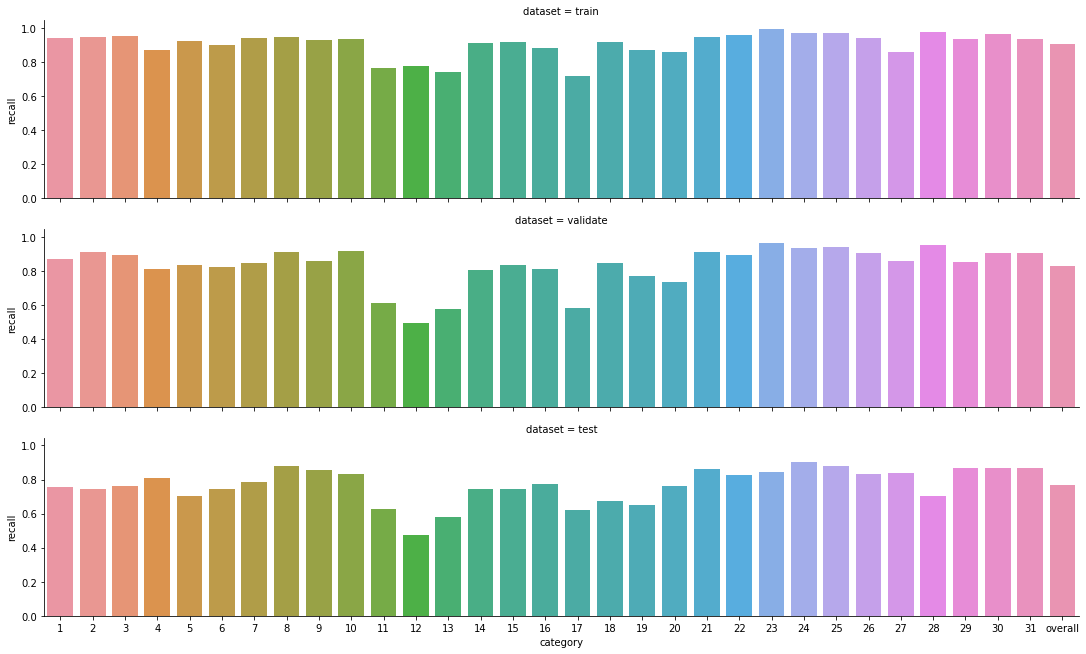

In [335]:
sns.catplot(data=metric_df, x="category", y="recall", row="dataset", kind="bar", orient='v', aspect=5, height=3)

In [251]:
# Read prediction_df
HOME_PATH = os.environ['FLUENT_HOME']
pred_df = pd.read_csv(f"{HOME_PATH}/result/predictions/{exp_id}_predictions_df.csv")
pred_df.head()

,Unnamed: 0,dataset,indices,label,prediced_probability,prediced_class,create_dt,model_id,remarks
0,0,train,13934,20,0.735013,16,20210714003953,20210714003953,NaN
1,1,train,15215,21,0.998899,21,20210714003953,20210714003953,NaN
2,2,train,2406,4,0.947318,4,20210714003953,20210714003953,NaN
3,3,train,12052,17,0.924086,17,20210714003953,20210714003953,NaN
4,4,train,19262,27,0.755045,27,20210714003953,20210714003953,NaN


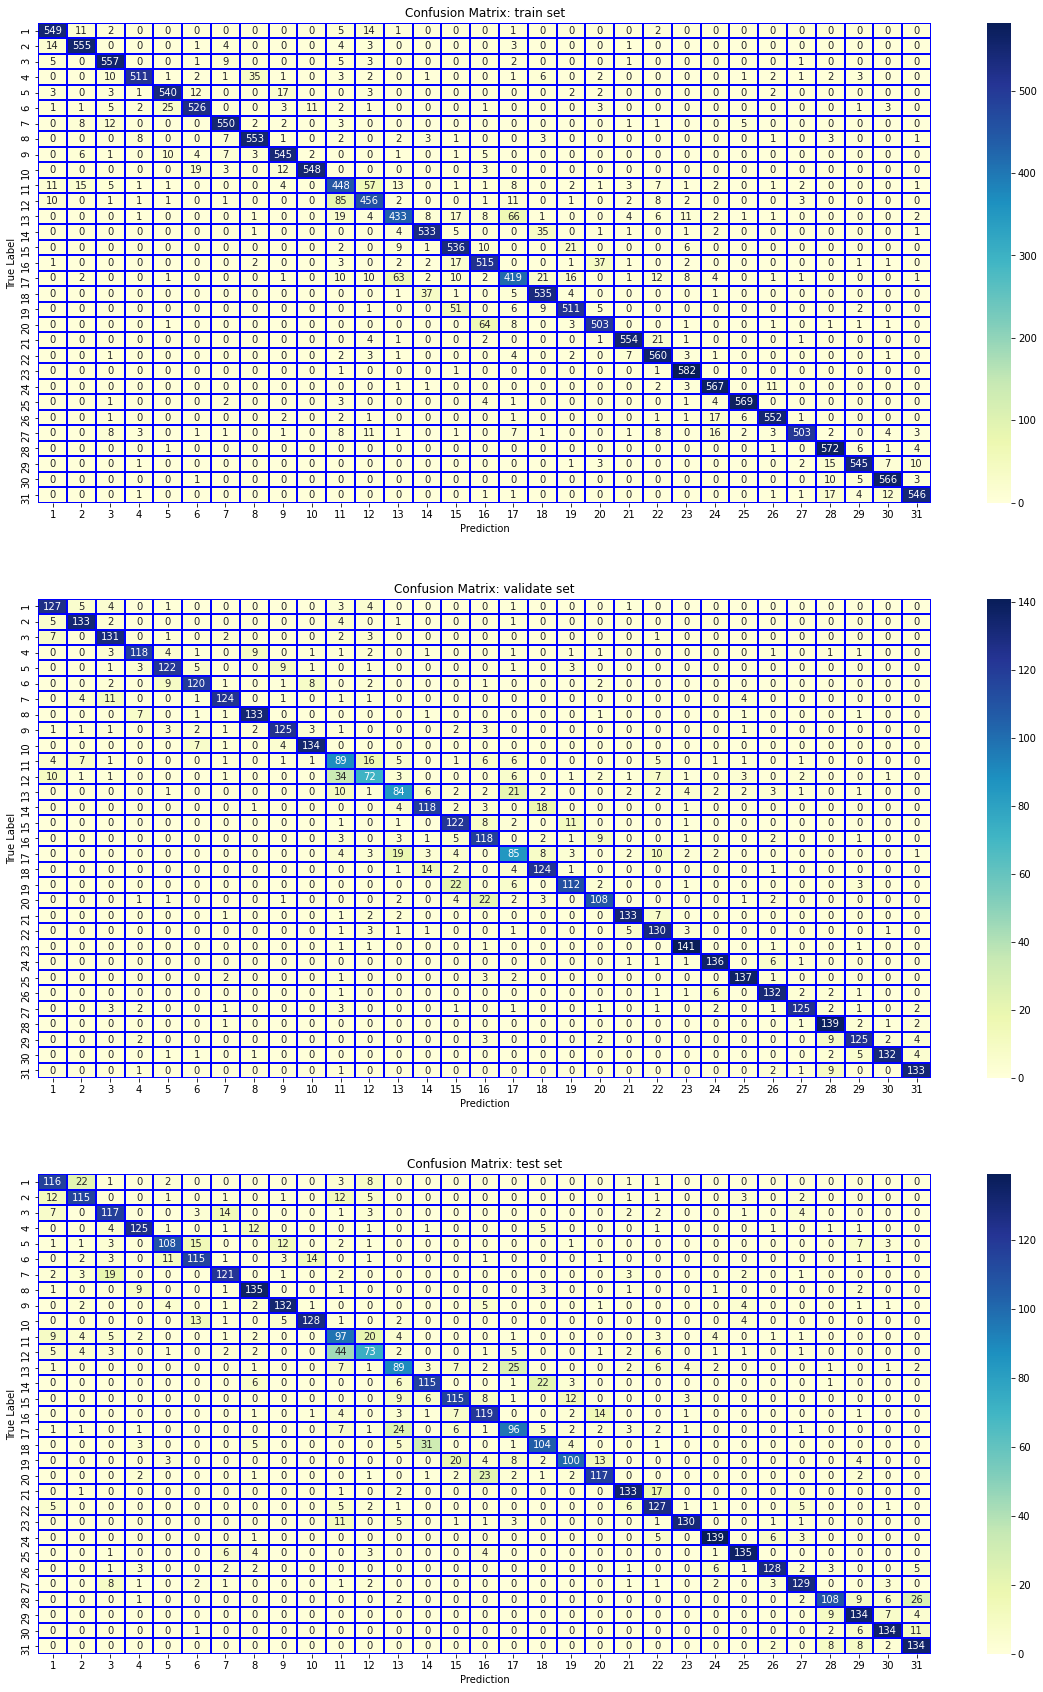

In [357]:
# Confusion Matrix
tick_labels = [str(i + 1) for i in range(31)]
fig, axes = plt.subplots(nrows=3, figsize=(20, 10 * 3))
for idx, keys in enumerate(['train', 'validate', 'test']):
    temp_df = pred_df[pred_df.dataset == keys]
    sns.heatmap(data=confusion_matrix(temp_df.label, temp_df.prediced_class), ax=axes[idx], cbar=True,
                xticklabels=tick_labels, yticklabels=tick_labels, cmap='YlGnBu', linewidths=.1, linecolor='b',
                annot=True, fmt='d', 
                )
    axes[idx].set_title(f'Confusion Matrix: {keys} set')
    axes[idx].set_xlabel('Prediction')
    axes[idx].set_ylabel('True Label')

In [3]:
# Read data
train_x, train_y = DataHandler.read_data('train')

[I 210714 20:50:11 data_handler:71] Loading train data


In [7]:
filtered_df = pred_df[pred_df.dataset != 'test']
pred_11 = filtered_df[filtered_df.label == 11]
pred_12 = filtered_df[filtered_df.label == 12]

Sampled:
 [[7655 7566 7791 7953 7833 8002]
 [7748 7846 7365 7551 7809 7334]]


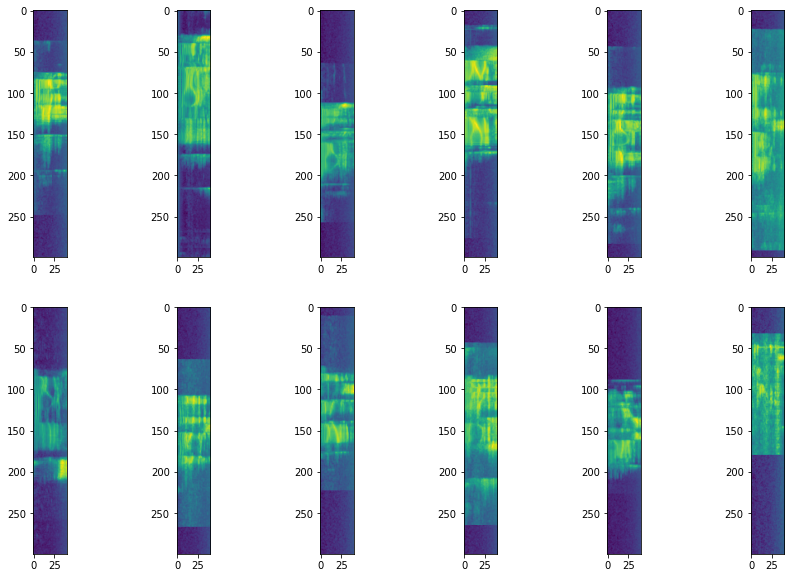

In [85]:
# Sample correctly predicted class 11 records
num_of_sample_r = 2
num_of_sample_c = 6
samples = np.random.choice(a=filtered_df.indices[(filtered_df.label == filtered_df.prediced_class) &
                                                (filtered_df.label == 11)],
                           size=num_of_sample_r*num_of_sample_c,
                           replace=False)

print("Sampled:\n", samples.reshape(num_of_sample_r, num_of_sample_c))
fig, axes = plt.subplots(nrows=num_of_sample_r, ncols=num_of_sample_c, figsize=(15,10))
for i, index in enumerate(samples):
    x = i % num_of_sample_c
    y = int(i/num_of_sample_c)
    _ = axes[y, x].imshow(train_x[index])

Sampled:
 [[7572 7629 7573 7866 7340 7559]
 [7356 7335 7473 7944 7432 7905]]


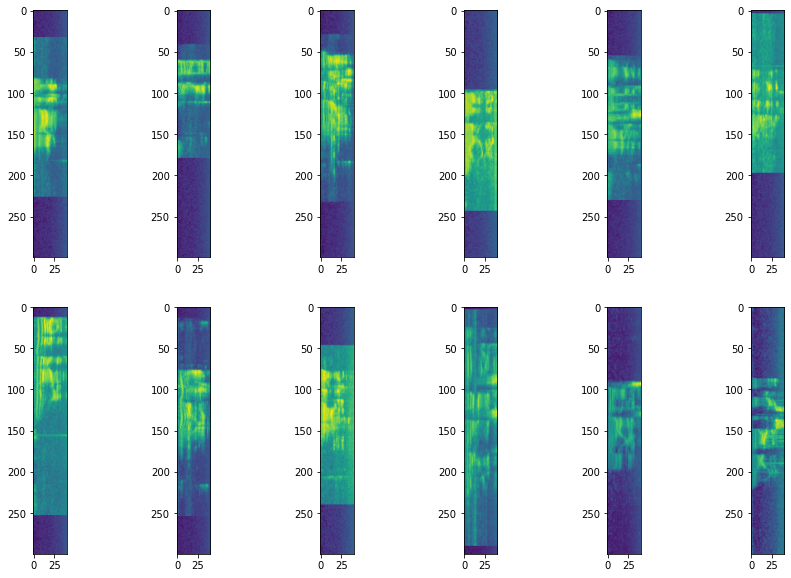

In [87]:
# Sample incorrectly predicted class 11 records
num_of_sample_r = 2
num_of_sample_c = 6
samples = np.random.choice(a=filtered_df.indices[(filtered_df.label != filtered_df.prediced_class) &
                                                (filtered_df.label == 11)],
                           size=num_of_sample_r*num_of_sample_c,
                           replace=False)

print("Sampled:\n", samples.reshape(num_of_sample_r, num_of_sample_c))
fig, axes = plt.subplots(nrows=num_of_sample_r, ncols=num_of_sample_c, figsize=(15,10))
for i, index in enumerate(samples):
    x = i % num_of_sample_c
    y = int(i/num_of_sample_c)
    _ = axes[y, x].imshow(train_x[index])

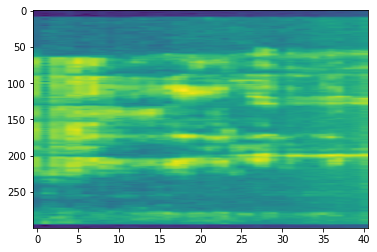

In [178]:
plt.imshow(train_x[5730], aspect='auto')

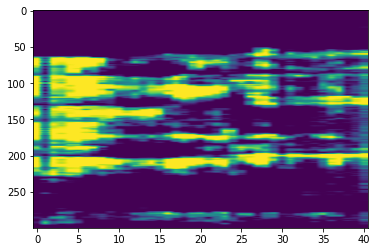

In [358]:
plt.imshow(np.clip(train_x[5730],0,1), aspect='auto')

(array([ 2.,  2.,  4.,  1.,  1.,  4., 12.,  5.,  7.,  3.]),
 array([0.61331826, 0.81254256, 1.0117669 , 1.2109911 , 1.4102155 ,
        1.6094397 , 1.8086641 , 2.0078883 , 2.2071126 , 2.406337  ,
        2.6055613 ], dtype=float32),
 <BarContainer object of 10 artists>)

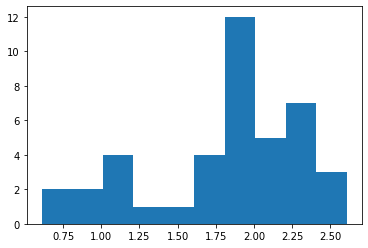

In [212]:
plt.hist(train_x[7864].max(axis=0))

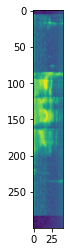

In [232]:
max_ap = train_x.reshape(-1, 300*41).max(axis=1)
min_ap = train_x.reshape(-1, 300*41).min(axis=1)
range_ap = max_ap - min_ap
plt.imshow(((train_x - min_ap.reshape(-1, 1, 1)) / range_ap.reshape(-1, 1, 1))[0])
# (train_x - min_ap) / range_ap

<BarContainer object of 41 artists>

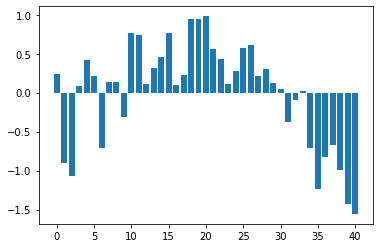

In [119]:
plt.bar(x=range(41), height=sampled[200][75]-np.mean(sampled[200][75]))

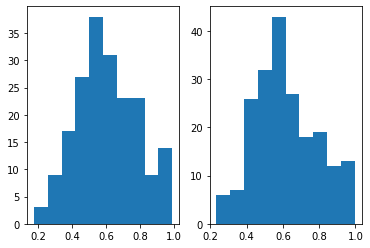

In [34]:
fig, axes = plt.subplots(ncols=2)
_ = axes[0].hist(pred_11[pred_11.label != pred_11.prediced_class].prediced_probability)
_ = axes[1].hist(pred_12[pred_12.label != pred_12.prediced_class].prediced_probability)

In [117]:
sampled[200][75]

array([ 1.2989621 ,  0.15052544, -0.01594157,  1.1421742 ,  1.4759746 ,
        1.2732903 ,  0.34750056,  1.1929959 ,  1.1889406 ,  0.7357387 ,
        1.8187459 ,  1.7967944 ,  1.1653736 ,  1.3705155 ,  1.5083961 ,
        1.8202256 ,  1.1585226 ,  1.2832541 ,  2.000801  ,  1.9940906 ,
        2.0349426 ,  1.6189364 ,  1.489953  ,  1.170167  ,  1.3382416 ,
        1.6298804 ,  1.6643674 ,  1.2669154 ,  1.3562297 ,  1.1760235 ,
        1.0968392 ,  0.67613053,  0.9637176 ,  1.0775273 ,  0.3471552 ,
       -0.18065175,  0.22554722,  0.38820806,  0.06723341, -0.37936682,
       -0.5014753 ], dtype=float32)

<BarContainer object of 41 artists>

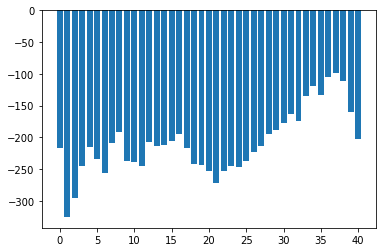

In [64]:
plt.bar(x=range(41), height=sampled[1000].sum(axis=0))